# Research Question: How does college degree attainment influence employment rates and job prospects, and what are the differences in employment outcomes between college graduates and non-graduates?

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

# Data Origins
##### The following data originates from the **Economic Policy Institue (EPI)**. For the past three decades, **EPI** has operated as a nonpartisan, nonprofit think tank dedicated to addressing significant economic issues. Its mission focuses on combating increasing inequality, improving the conditions of low wages and inadequate benefits for workers, spurring slower economic growth, rectifying poor employment conditions, and narrowing the racial wage gap. EPI's efforts aim to bring substantive changes to policy and practice, ensuring fairer economic conditions for working people.

#### FYI: **NOT** all the datafiles will be used for this presentation


In [ ]:
all_agesDF = pd.read_csv('/content/all-ages.csv')
grad_studentsDF = pd.read_csv('/content/grad-students.csv')
major_listDF = pd.read_csv('/content/majors-list.csv')
recent_gradsDF = pd.read_csv('/content/recent-grads.csv')
women_stemDF = pd.read_csv('/content/women-stem.csv')
wages_by_eduDF = pd.read_csv('/content/wages_by_edu.csv')

***Sileo Nomen***
#### "all_agedDF"
#### Each row in the dataset corresponds to a specific major and contains several key pieces of information

1.   Major Code and Major: Unique identifiers for each major.
2. Major Category: The broad category to which the major belongs.
3. Total: The total number of individuals who have graduated with the respective major.
4. Employed: The number of graduates who are employed.
5. Employed Full Time Year Round: The subset of employed graduates who work full-time on a year-round basis.
6. Unemployed: The number of graduates who are currently unemployed.
7. Unemployment Rate: The percentage of the total graduates who are unemployed.
8. Median, P25th, and P75th Wages: These columns represent the median, 25th percentile, and 75th percentile wages of graduates in these majors,
##### Unfortunately the data does not provide a data column value



## About The Data
#### "wages_by_eduDF" The dataset provided includes detailed annual data on median hourly wages, segmented by educational attainment and further differentiated by gender and ethnicity.


#### Columns

1. **year**: The year of the recorded data.
2. **men_less_than_hs**: Percentage of men who have less than a high school education.
3. **men_high_school**: Percentage of men who have a high school education.
4. **men_some_college**: Percentage of men who have attended some college.
5. **men_bachelors_degree**: Percentage of men who have obtained a bachelor's degree.
6. **men_advanced_degree**: Percentage of men who have obtained an advanced degree (e.g., master's, professional, or doctorate).
7. **women_less_than_hs**: Percentage of women who have less than a high school education.
8. **women_high_school**: Percentage of women who have a high school education.
9. **women_some_college**: Percentage of women who have attended some college.
10. **women_bachelors_degree**: Percentage of women who have obtained a bachelor's degree.
11. **women_advanced_degree**: Percentage of women who have obtained an advanced degree (e.g., master's, professional, or doctorate).




# Plotting Stacked Bar Chart using all_ages_df data

In [ ]:
bar_chart_agesDF = all_agesDF.copy() # We dont want modify the original dataset (maintain integrity)
# We are uninterested on the salary of each percentile within major categories, as that is covered in the visualization (Wages by education level).
bar_chart_agesDF.drop(['Median','P25th', 'P75th', 'Major_code'], axis = 1, inplace = True)

"""By calculating "not in labor force" for each major category we get an insight into the proportion
   of graduates who are neither employed nor actively seeking employment"""

bar_chart_agesDF['Not_in_labor_force'] = bar_chart_agesDF['Total'] - (bar_chart_agesDF['Employed'] + bar_chart_agesDF['Unemployed'])

Major_data= bar_chart_agesDF.groupby('Major_category')[['Total', 'Employed', 'Employed_full_time_year_round', 'Unemployed', 'Not_in_labor_force']].sum().reset_index()

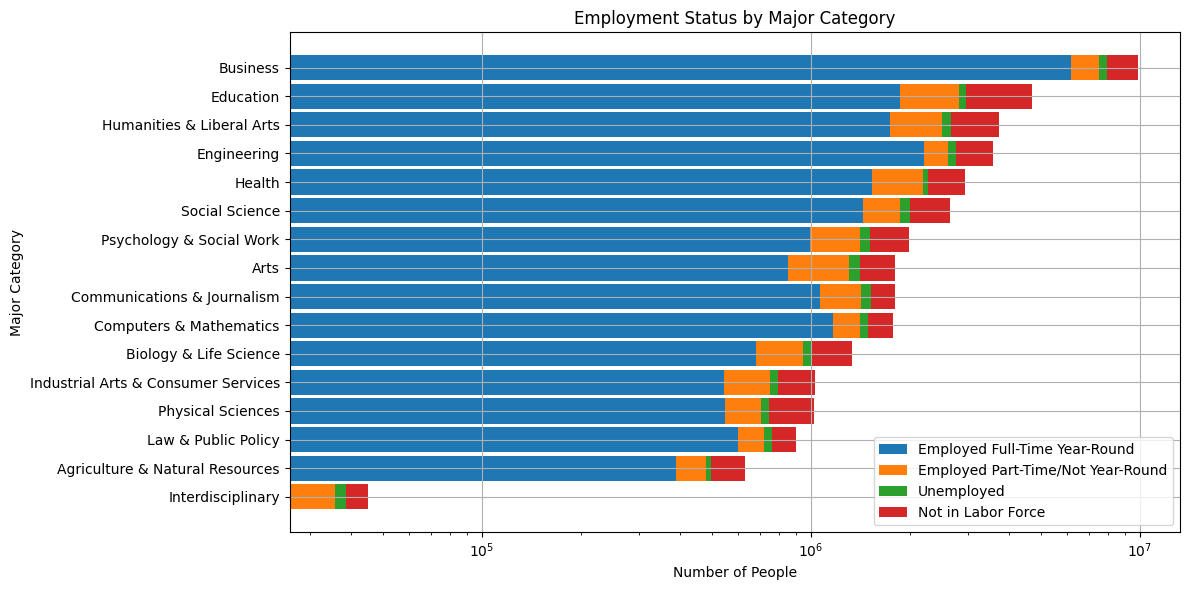

In [ ]:
Major_data = Major_data.sort_values('Total') # Sort the values in descending order, imporve visibility/clarity
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.88  # Set the width of each bar
index = np.arange(len(Major_data))  # Set the x-axis positions for the bars
          # plot values for 'Employed_full_time_year_round'
ax.barh(index, Major_data['Employed_full_time_year_round'], bar_width, label='Employed Full-Time Year-Round')
          # plot values for 'Employed Part-Time/Not Year-Round' by subtracting values in Employed by Employed_full_time_year_round to get part-time workers count
ax.barh(index, Major_data['Employed'] - Major_data['Employed_full_time_year_round'], bar_width,
        left=Major_data['Employed_full_time_year_round'], label='Employed Part-Time/Not Year-Round')
          # plot values for 'Unemployed'
ax.barh(index, Major_data['Unemployed'], bar_width, left=Major_data['Employed'], label='Unemployed')
          # plot values for 'Not_in_labor_force
ax.barh(index, Major_data['Not_in_labor_force'], bar_width,
        left=Major_data['Employed'] + Major_data['Unemployed'], label='Not in Labor Force')

"""Not_in_labor_force column represents values from people who are either retired from their
careers that studied the specific major category or
students who are currently studying that major category and are not in the labor workforce."""

ax.set_ylabel('Major Category')
ax.set_xlabel('Number of People')
ax.set_title('Employment Status by Major Category')
ax.set_yticks(index)
ax.set_yticklabels(Major_data['Major_category'])
ax.legend()
ax.grid()
ax.set_xscale('log')  # Set the x-axis scale to logarithmic
plt.tight_layout()
plt.show()

***Sileo Nomen***

###The focus is on the distribution of graduates in terms of being employed full-time year-round, employed part-time or not year-round, unemployed, and not in the labor force.
### Key Takeaways from the Analysis

1. **Employment Distribution**:
   - **Business and Education** majors show the highest number of graduates employed full-time year-round, this is a good indicator for business majors.
   - **Humanities & Liberal Arts** and **Arts** have a higher proportion of graduates not in the labor force compared to other fields.

2. **Unemployment Rates**:
   - Majors such as **History** and **Communications & Journalism** have higher unemployment rates compared to fields like **Engineering** and **Computers & Mathematics**.
   
3. **Part-Time Employment**:
   - Fields such as **Psychology & Social Work** and **Industrial Arts & Consumer Services** show a notable proportion of part-time or not year-round employment.

4. **Not in Labor Force**:
   - Some major categories like **Interdisciplinary Studies** and **Physical Sciences** have a significant number of graduates not in the labor force, which could include retired individuals or current students.


# Plotting line plot using wages_by_eduDF

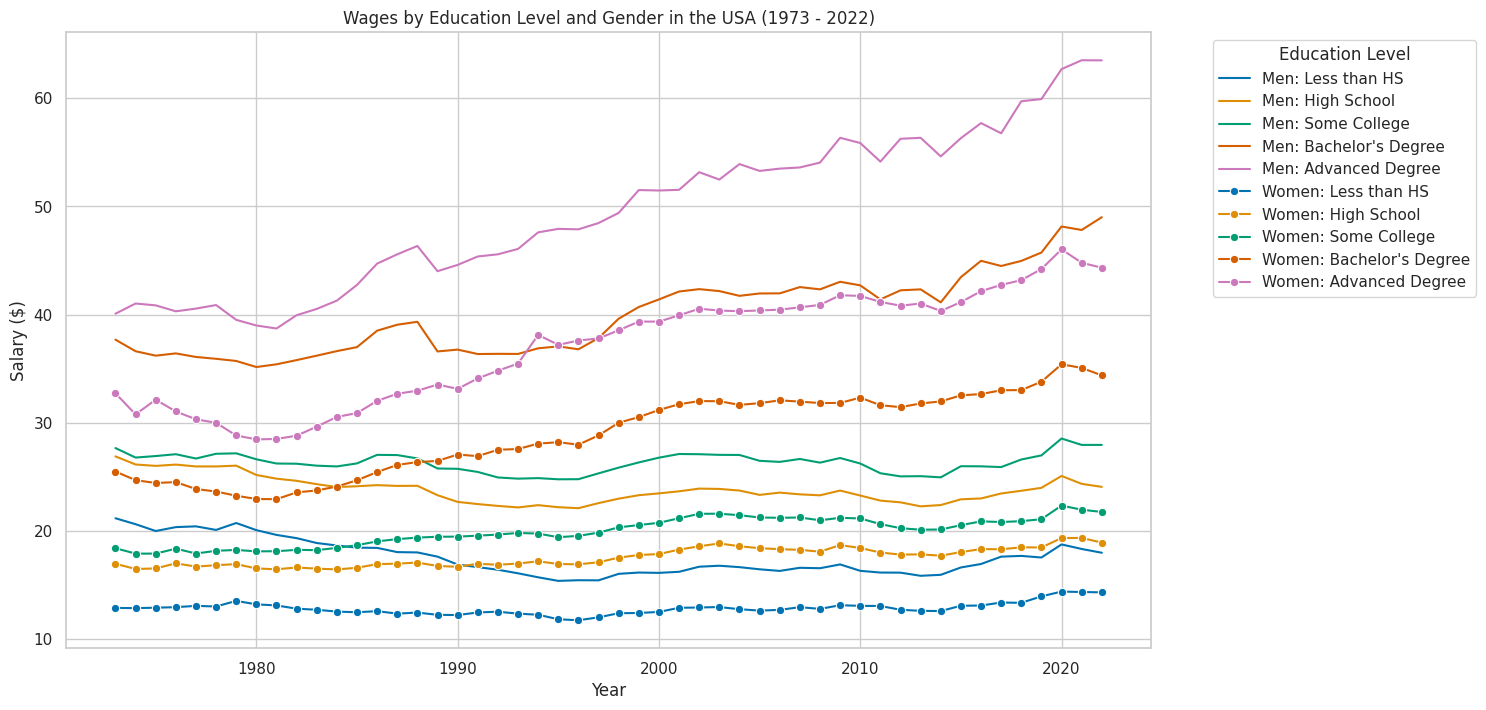

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
palette = sns.color_palette("colorblind") #colorblind friendly color theme :)

# Men data with solid lines
sns.lineplot(x="year", y="men_less_than_hs", data=wages_by_eduDF, label="Men: Less than HS", color=palette[0], linestyle='-')
sns.lineplot(x="year", y="men_high_school", data=wages_by_eduDF, label="Men: High School", color=palette[1], linestyle='-')
sns.lineplot(x="year", y="men_some_college", data=wages_by_eduDF, label="Men: Some College", color=palette[2], linestyle='-')
sns.lineplot(x="year", y="men_bachelors_degree", data=wages_by_eduDF, label="Men: Bachelor's Degree", color=palette[3], linestyle='-')
sns.lineplot(x="year", y="men_advanced_degree", data=wages_by_eduDF, label="Men: Advanced Degree", color=palette[4], linestyle='-')

# Women data with dashed lines (distinguish)
sns.lineplot(x="year", y="women_less_than_hs", data=wages_by_eduDF, marker='o', label="Women: Less than HS", color=palette[0], linestyle='-') #plotting
sns.lineplot(x="year", y="women_high_school", data=wages_by_eduDF, marker='o', label="Women: High School", color=palette[1], linestyle='-')
sns.lineplot(x="year", y="women_some_college", data=wages_by_eduDF, marker='o', label="Women: Some College", color=palette[2], linestyle='-')
sns.lineplot(x="year", y="women_bachelors_degree", data=wages_by_eduDF, marker='o', label="Women: Bachelor's Degree", color=palette[3], linestyle='-')
sns.lineplot(x="year", y="women_advanced_degree", data=wages_by_eduDF, marker='o', label="Women: Advanced Degree", color=palette[4], linestyle='-')

plt.title('Wages by Education Level and Gender in the USA (1973 - 2022)')
plt.xlabel('Year')
plt.ylabel('Salary ($)')
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

***Sileo Nomen***
### Overview of the Data

#### Description
The dataset provides annual percentages of individuals in the United States who have attained various levels of education. It is divided by gender, tracking wages from less than high school to advanced degrees for both men and women over the years. The data covers a range of years (1973-2022), allowing for the analysis of trends and comparisons between genders.


#### Key Insights

1. **Trends Over Time**: The dataset allows us to observe trends in educational attainment over time. For example, we can see whether the percentage of individuals attaining higher education levels has increased or decreased over the years.
  
2. **Gender Comparisons**: The dataset provides a basis for comparing educational attainment between men and women. We can examine whether there are significant differences in the levels of education achieved by gender.

3. **Educational Attainment Levels**:
   - **Less than High School**: This category can indicate the percentage of the population that has not completed high school. Observing this trend can show changes in the dropout rates over the years.
   - **High School**: This category shows the percentage of the population that has completed high school. It provides a benchmark for basic education attainment.
   - **Some College**: This indicates the percentage of individuals who have attended college but may not have completed a degree. This can reflect the accessibility and attractiveness of higher education.
   - **Bachelor's Degree**: This category shows the percentage of the population that has obtained a four-year college degree, a critical measure of higher education attainment.
   - **Advanced Degree**: This indicates the percentage of individuals who have pursued education beyond a bachelor's degree, showing the trend in advanced education.

4. **Policy Implications**: Understanding these trends can help policymakers design interventions to improve educational outcomes and address gender disparities in education.

#### Visualization Strategy

To effectively visualize this data:
- Use different line styles (solid and dashed) to differentiate between genders.
- Use a color-blind-friendly palette to ensure accessibility.
- Include markers for one gender and clean lines for the other to maintain clarity without clutter.
- Provide clear legends and labels to help viewers understand the data.
